In [1]:
import pandas as pd
import jax.numpy as jnp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from kappa_loss_perceptron import KappaLossPerceptron
from sklearn.preprocessing import StandardScaler

Playground notebook for KappaLossPerceptron

In [2]:
df = pd.read_csv("./data/preprocessed_data.csv", index_col=0)
TARGET = "NSP"
FEATURES = df.columns.drop(TARGET)
Xdf = df[FEATURES]
ydf = df[TARGET]
NUM_CLASSES = 3

In [3]:
# Without normalizing the data, the optimizer got stuck in local minima
X = StandardScaler().fit(Xdf.values).transform(Xdf.values)
# X = Xdf.values
# need to have the classes start at 0 instead of 1 for scoring to work properly
y = ydf.values - 1  # type: ignore

# Penalties for different types of class confusion
weights = np.array([
# Predicted   N    S    P     # True
            [0.0, 0.5, 0.6],  # N
            [1.0, 0.0, 0.3],  # S
            [2.0, 0.6, 0.0]   # P
])

klp = KappaLossPerceptron(num_classes=NUM_CLASSES, weight_matrix=weights)

Stopping early after 221 iterations.


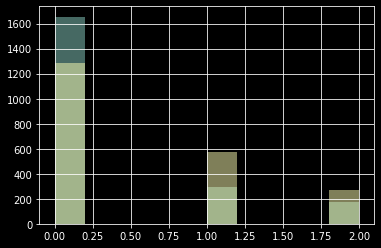

Score: 0.6854007656324832


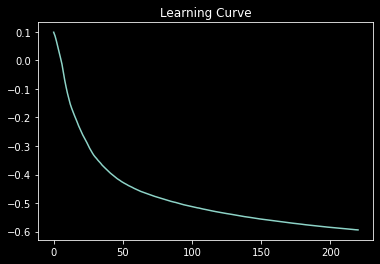

In [4]:
klp.fit(X, y, epochs=10000, verbose=False)#, clean=False)
y_hat = klp.predict(X)
pd.Series(y).hist(alpha=.5) 
pd.Series(y_hat).hist(alpha=.5) 
plt.show()
pd.Series(klp.loss_values).astype(float).plot(title="Learning Curve")
print("Score:", klp.prediction_kappa(X, y))